In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# EDA

## Limpieza de Datos

In [2]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

In [3]:
df_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
df_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [6]:
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [7]:
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

El único año que contiene nulos es 2018. El resto parece estar completo.

In [8]:
df_2018.loc[df_2018['Perceptions of corruption'].isna()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


Al buscar el valor faltante, se encontró que en el reporte de 2018 del World Happiness Report, Los Emiratos Árabes Unidos tienen un valor de percepción de la corrupción de 0.186, por lo que se agregó a la data faltante. Al revisar la fila a mayor detalle, se encontró que en realidad se copiaron de forma errónea todos los valores de la fila de los Emiratos Árabes Unidos, por lo que se reemplazaron los valores erróneos.  
Fuente: https://worldhappiness.report/ed/2018/#appendices-and-data  
Chapter 2: Online Data, Figure 2.2  

Helliwell, J., Layard, R., & Sachs, J. (2018). World Happiness Report 2018, New York: Sustainable Development Solutions Network.

In [9]:
df_2018.at[19, 'GDP per capita'] = 1.467
df_2018.at[19, 'Social support'] = 1.296
df_2018.at[19, 'Healthy life expectancy'] = 0.776
df_2018.at[19, 'Freedom to make life choices'] = 0.670
df_2018.at[19, 'Generosity'] = 0.284
df_2018.at[19, 'Perceptions of corruption'] = 0.186

In [10]:
df_2018.loc[19]

Overall rank                                      20
Country or region               United Arab Emirates
Score                                          6.774
GDP per capita                                 1.467
Social support                                 1.296
Healthy life expectancy                        0.776
Freedom to make life choices                    0.67
Generosity                                     0.284
Perceptions of corruption                      0.186
Name: 19, dtype: object

In [11]:
df_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [12]:
df_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [13]:
df_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [14]:
df_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [15]:
df_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

En los 5 dataframes, todas las métricas son floats, el ranking son enteros y los países son objetos (strings). Todo esto es de esperar, por lo que parece ser que los dataframes tienen la estructura y tipo de datos deseado.

## Verificación de duplicados

In [16]:
print(len(df_2015['Country'].unique()), len(df_2015))
print(len(df_2016['Country'].unique()), len(df_2016))
print(len(df_2017['Country'].unique()), len(df_2017))
print(len(df_2018['Country or region'].unique()), len(df_2018))
print(len(df_2019['Country or region'].unique()), len(df_2019))

158 158
157 157
155 155
156 156
156 156


No se encontraron países repetidos en ninguno de los datasets, ya que sus valores únicos son iguales a la longitud total de los datasets.

In [17]:
print(len(df_2015['Happiness Rank'].unique()), len(df_2015))
print(len(df_2016['Happiness Rank'].unique()), len(df_2016))
print(len(df_2017['Happiness.Rank'].unique()), len(df_2017))
print(len(df_2018['Overall rank'].unique()), len(df_2018))
print(len(df_2019['Overall rank'].unique()), len(df_2019))

157 158
154 157
155 155
156 156
156 156


En cuanto a los rankings de felicidad, hay rankings repetidos en 2015 y 2016, por lo que es necesario revisar si se debe a un verdadero empate o un error.

In [18]:
df_2015['Happiness Rank'].value_counts()

Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64

In [19]:
df_2015.loc[df_2015['Happiness Rank'].isin([82,83,84])]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040


Al revisar en 2015, si se debe a un empate en el 'Happiness Score' de Jordania y Montenegro. Se maneja correctamente el empate, ya que el siguiente ranking sí salta de 82 a 84 (se omite 83, pues hay 2 países con 82).

In [20]:
df_2016['Happiness Rank'].value_counts()

Happiness Rank
57     2
34     2
145    2
1      1
108    1
      ..
54     1
55     1
56     1
59     1
157    1
Name: count, Length: 154, dtype: int64

In [21]:
df_2016.loc[df_2016['Happiness Rank'].isin([57,58,59,34,35,36,145,146,147])]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,6.287,6.471,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482
34,Taiwan,Eastern Asia,34,6.379,6.305,6.453,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523
35,Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224
56,Poland,Central and Eastern Europe,57,5.835,5.749,5.921,1.24585,1.04685,0.69058,0.45190,0.05500,0.14443,2.20035
57,South Korea,Eastern Asia,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015
58,Bolivia,Latin America and Caribbean,59,5.822,5.740,5.904,0.79422,0.83779,0.46970,0.50961,0.07746,0.21698,2.91635
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
145,Uganda,Sub-Saharan Africa,145,3.739,3.629,3.849,0.34719,0.90981,0.19625,0.43653,0.06442,0.27102,1.51416
146,Yemen,Middle East and Northern Africa,147,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295


Al revisar en 2016, sí se debe a tres empates en el 'Happiness Score' de Arabia Saudita y Taiwan, Polonia y Corea del Sur, y Burkina Faso y Uganda. También hay manejo correcto de los rankings siguientes a los empates.

## DataFrame Conjunto

In [22]:
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

Columnas en común entre todos los años:

country,region,happiness rank, happines score,gdp,health,

country
happines rank
happines score
gdp
health
freedom
corruption
generosity
2018 no tiene family y distopia residual Solo 2018 y 2019 tienen social support

Solo 2016 y 2017 tienen Lower y Upper confidence interval

2017,2018 y 2019 no tienen región

In [23]:

dataframe_2015 = df_2015[['Country', 'Happiness Rank', 'Happiness Score', 
                                 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 
                                 'Freedom', 'Trust (Government Corruption)', 'Generosity']].copy()
dataframe_2015.rename(columns={
    'Economy (GDP per Capita)': 'GDP',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Corruption'
}, inplace=True)
dataframe_2015['Year'] = 2015

# DataFrame 2016
dataframe_2016 = df_2016[['Country', 'Happiness Rank', 'Happiness Score', 
                                 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 
                                 'Freedom', 'Trust (Government Corruption)', 'Generosity']].copy()
dataframe_2016.rename(columns={
    'Economy (GDP per Capita)': 'GDP',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Corruption'
}, inplace=True)
dataframe_2016['Year'] = 2016

# DataFrame 2017
dataframe_2017 = df_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 
                                 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 
                                 'Freedom', 'Trust..Government.Corruption.', 'Generosity']].copy()
dataframe_2017.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'GDP',
    'Health..Life.Expectancy.': 'Health',
    'Trust..Government.Corruption.': 'Corruption'
}, inplace=True)
dataframe_2017['Year'] = 2017

# DataFrame 2018
dataframe_2018 = df_2018[['Country or region', 'Overall rank', 'Score', 
                                 'GDP per capita', 'Healthy life expectancy', 
                                 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].copy()
dataframe_2018.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Healthy life expectancy': 'Health',
    'Perceptions of corruption': 'Corruption',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)
dataframe_2018['Year'] = 2018

# DataFrame 2019
dataframe_2019 = df_2019[['Country or region', 'Overall rank', 'Score', 
                                 'GDP per capita', 'Healthy life expectancy', 
                                 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].copy()
dataframe_2019.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Healthy life expectancy': 'Health',
    'Perceptions of corruption': 'Corruption',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)
dataframe_2019['Year'] = 2019

In [24]:
# Concatenar todos los DataFrames en uno solo
df_concatenated = pd.concat([dataframe_2015, dataframe_2016, dataframe_2017, dataframe_2018, dataframe_2019], ignore_index=True)

# Verificar el resultado
df_concatenated.head()

,Country,Happiness Rank,Happiness Score,GDP,Health,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015


## Análisis visual con Insights

In [25]:
df_concatenated.describe() 

,Happiness Rank,Happiness Score,GDP,Health,Freedom,Corruption,Generosity,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.915243,0.612551,0.411584,0.125513,0.218701,2016.993606
std,45.182384,1.127456,0.405625,0.248369,0.153093,0.105771,0.122338,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.440183,0.310500,0.054250,0.130000,2016.000000
50%,79.000000,5.322000,0.982205,0.647310,0.431330,0.091033,0.202000,2017.000000
75%,118.000000,6.189500,1.236187,0.808000,0.531165,0.156243,0.279705,2018.000000
max,158.000000,7.769000,1.870766,1.141000,0.724000,0.551910,0.838075,2019.000000


Las variables numéricas verdaderas no incluyen al año ni el ranking, ya que el año es para reconocer de qué dataframe proviene y el ranking es un ordenamiento que se le da al score. Estas se removerán del análisis numérico.

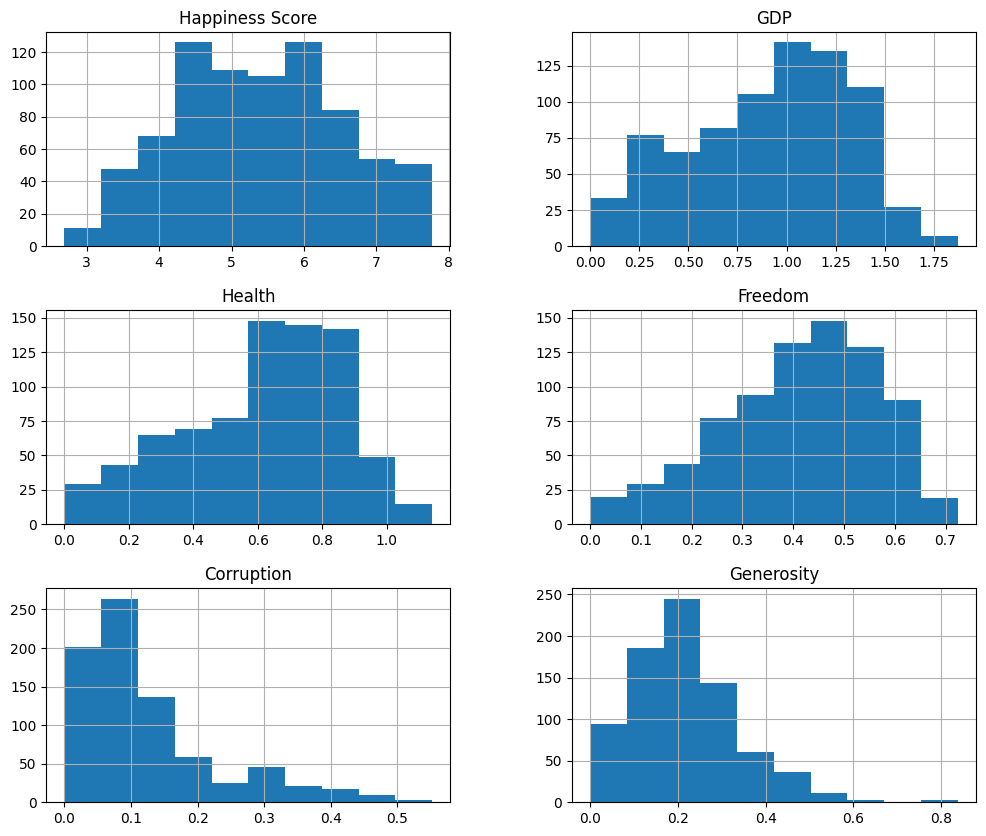

In [26]:
vars_num = ['Happiness Score', 'GDP', 'Health', 'Freedom', 'Corruption', 'Generosity']
df_concatenated[vars_num].hist(figsize=(12,10))
plt.show()

Esta es la distribución de las variables numéricas en conjunto durante todos los años.

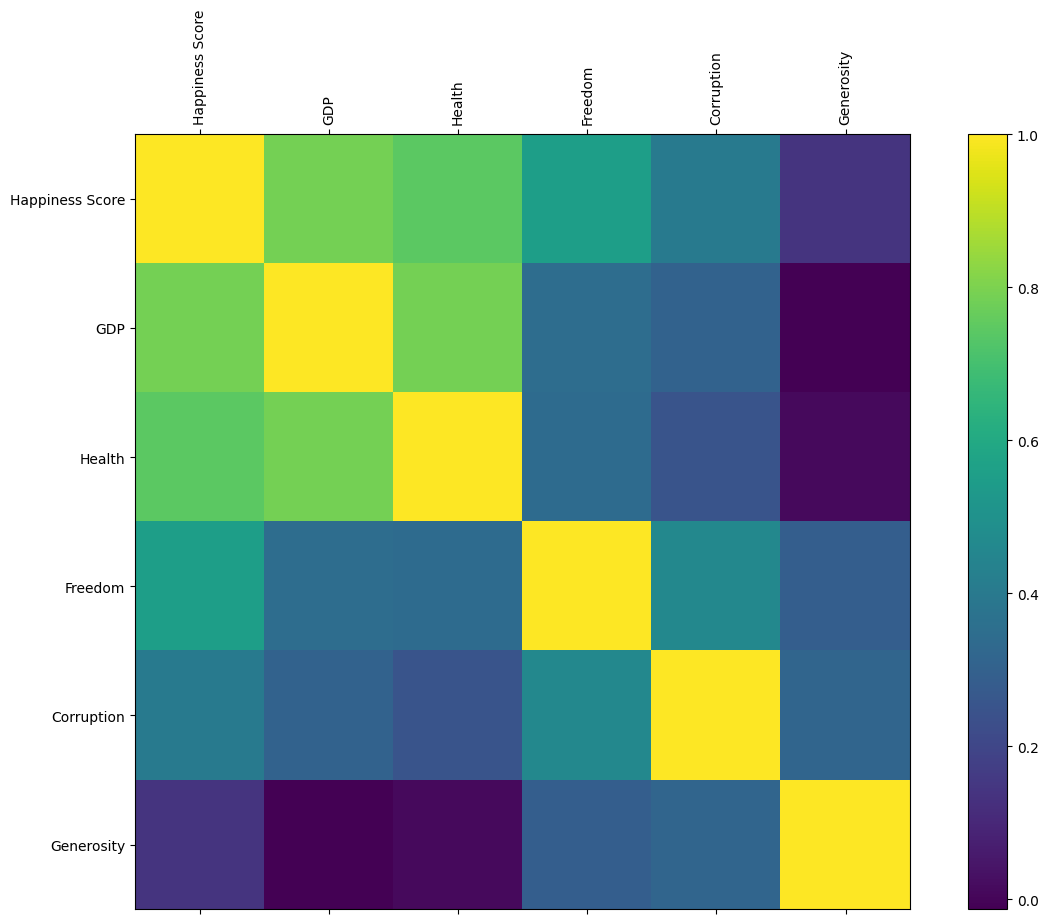

In [27]:
correlation = df_concatenated[vars_num].corr()
plt.figure(figsize=(15,10))
plt.matshow(correlation, fignum=1)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.colorbar()
plt.show()

Las variables que más correlación tienen con el Happiness Score son el GDP y la salud.

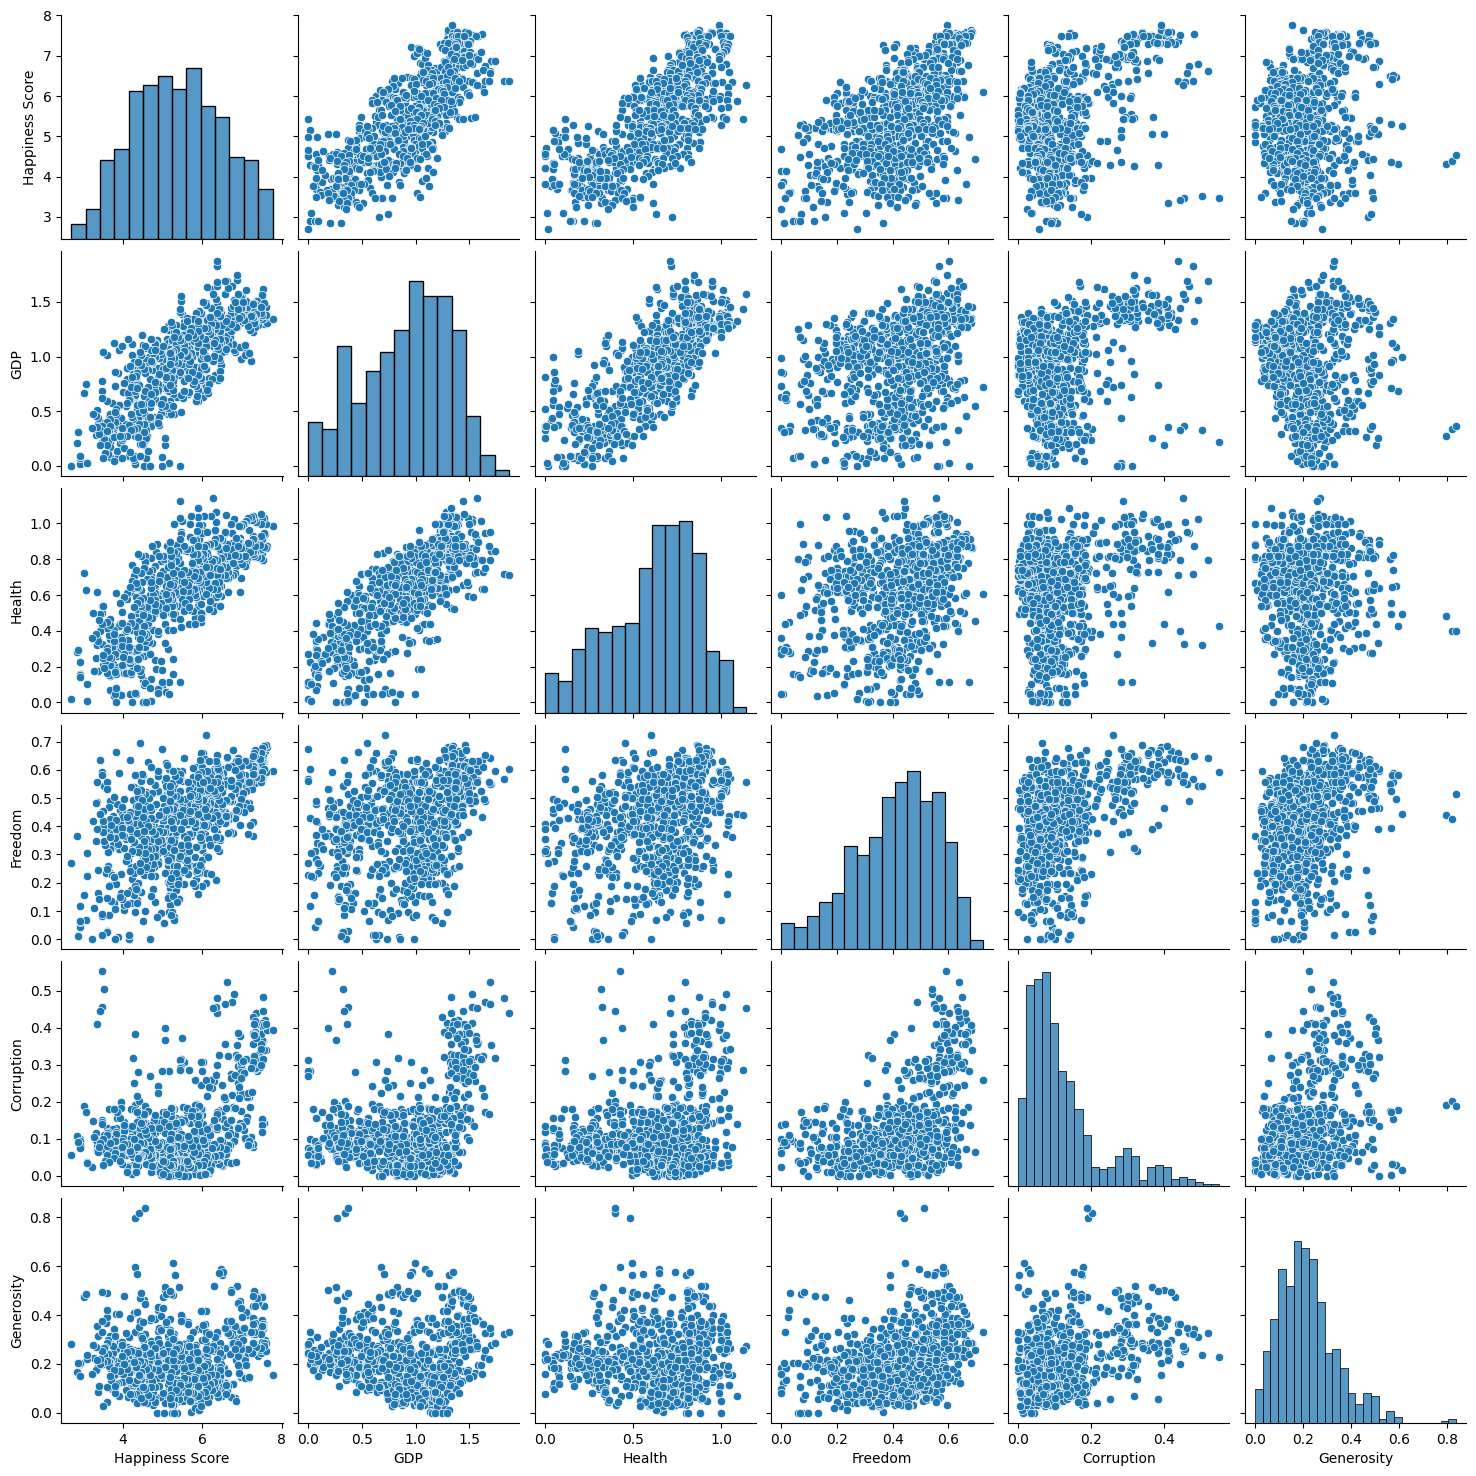

In [28]:
sns.pairplot(df_concatenated[vars_num])
plt.show()

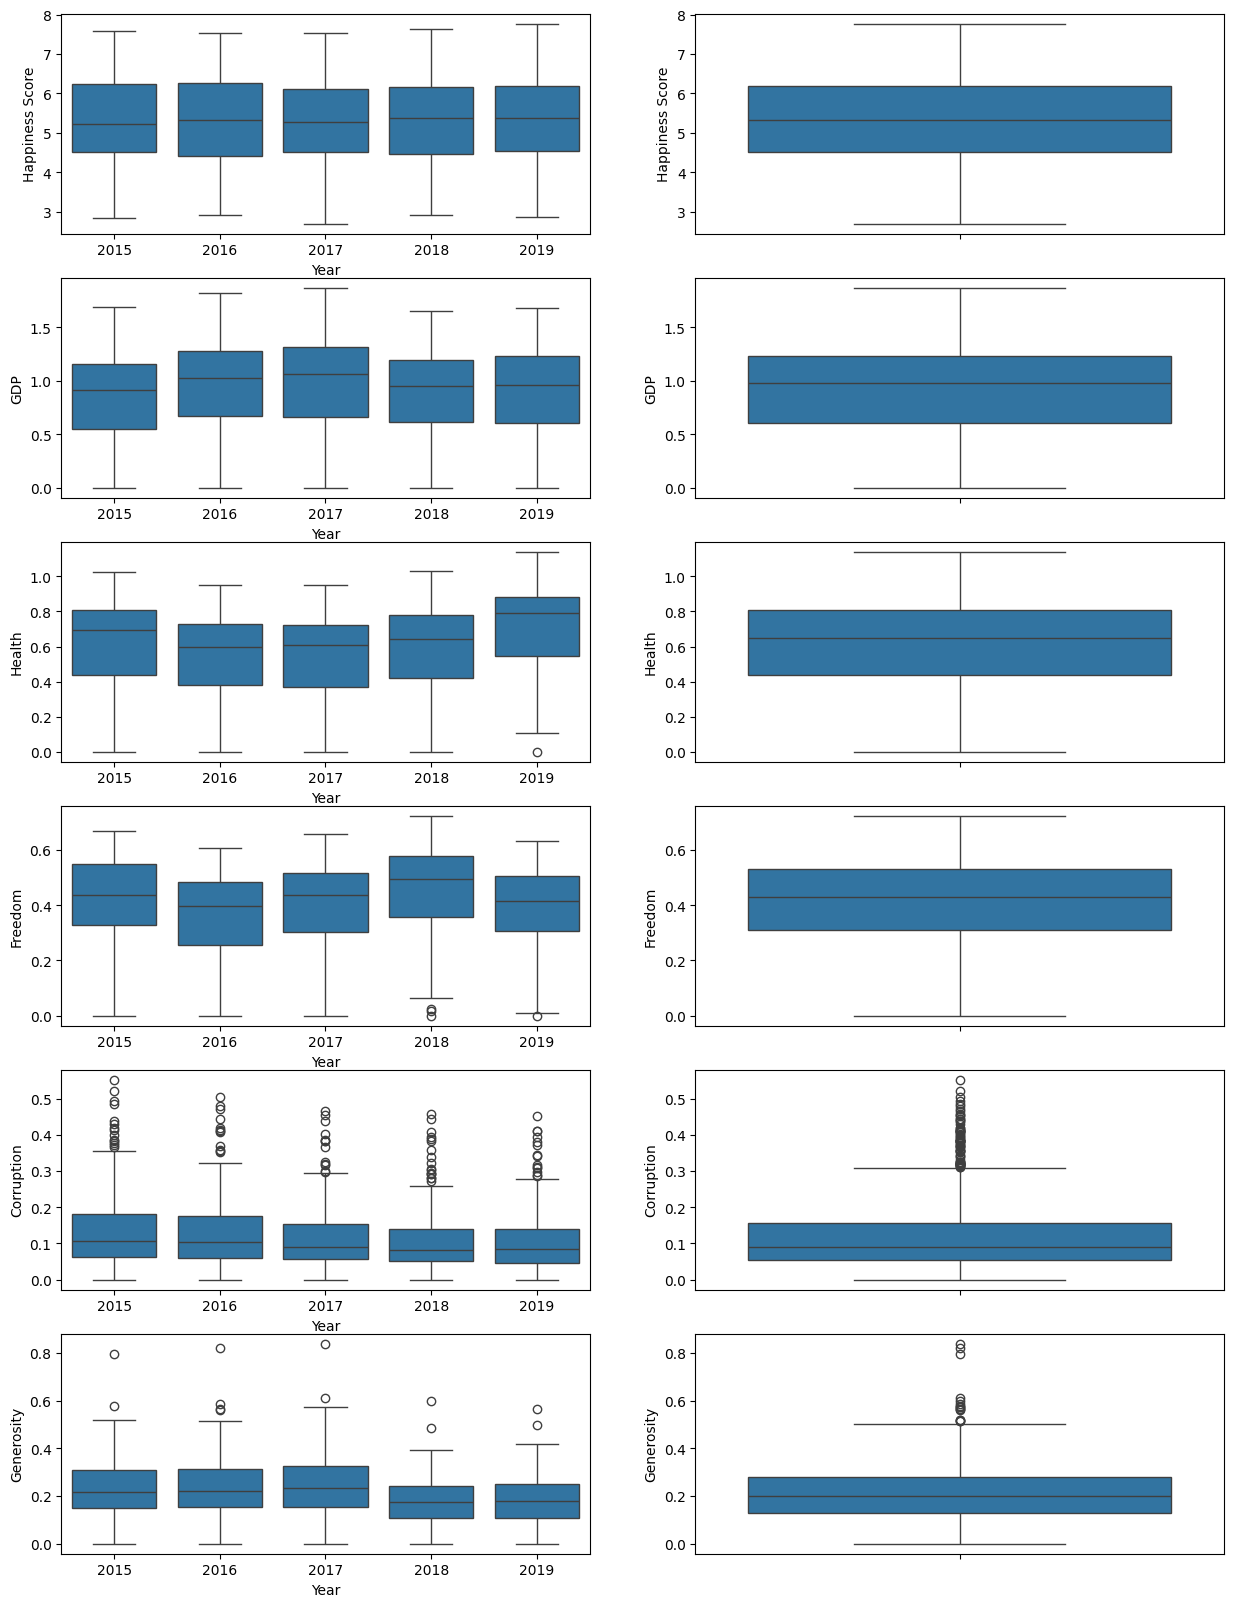

In [29]:
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
for i, var in enumerate(vars_num):
    sns.boxplot(data=df_concatenated, x='Year', y=var, ax=axs[i, 0])
    sns.boxplot(df_concatenated[var], ax=axs[i, 1])
plt.show()

Interesantemente, la corrupción es la variable con más outliers.

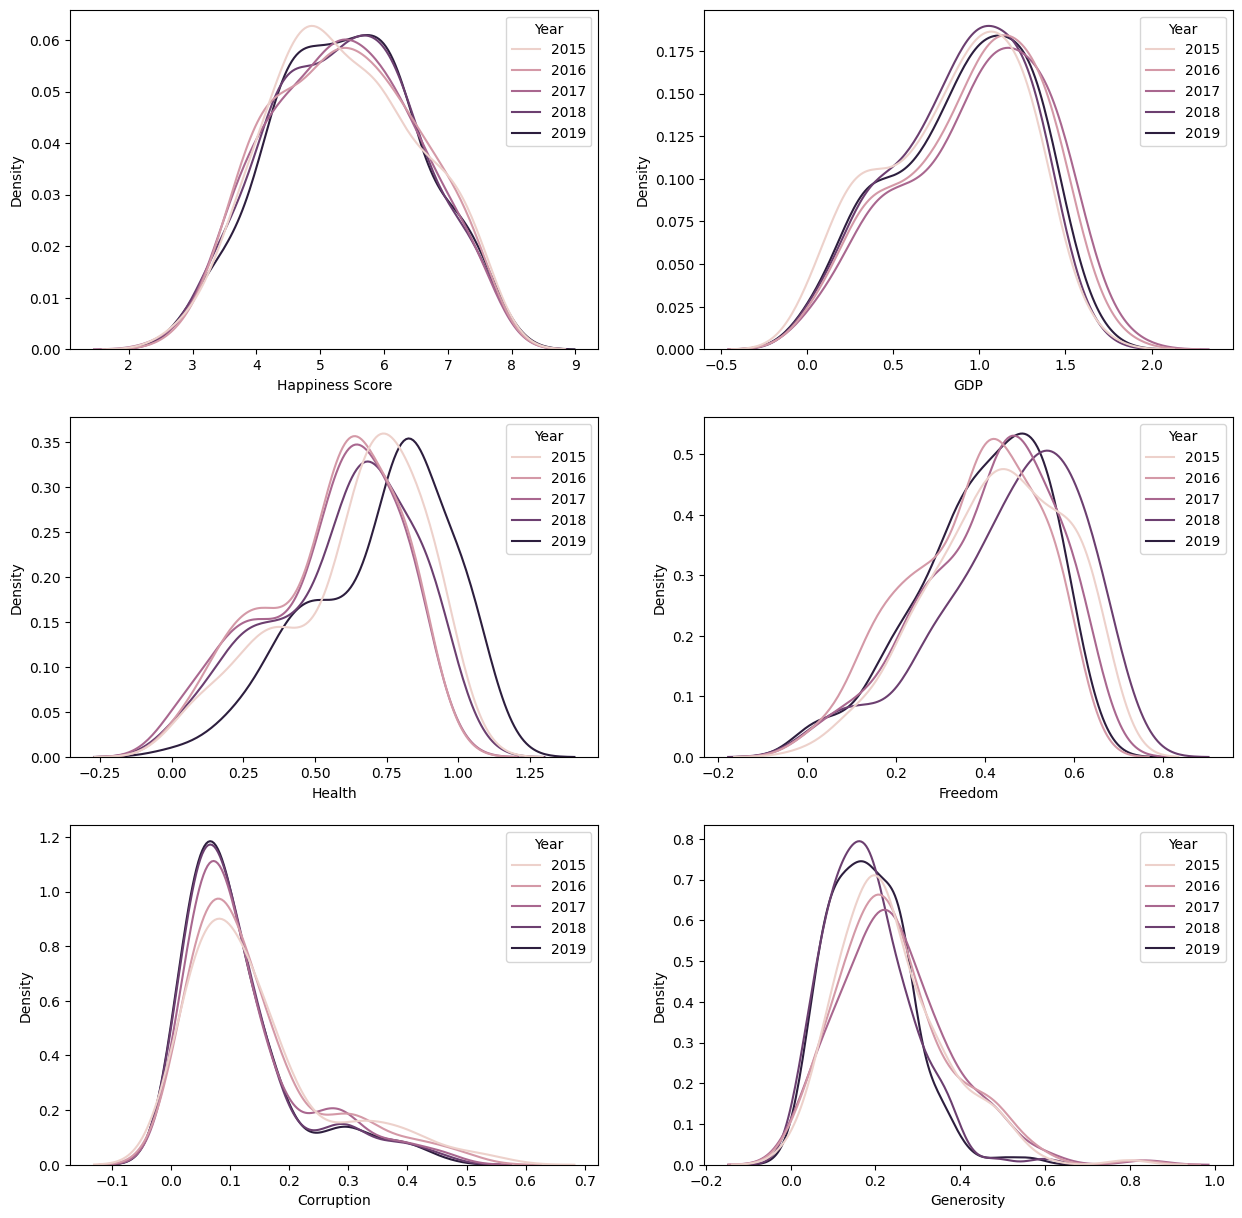

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, var in enumerate(vars_num):
    sns.kdeplot(data=df_concatenated, x=var, hue='Year', ax=axs[i//2, i%2])
plt.show()

En este gráfico podemos observar las distribuciones de las variables numéricas separadas por año.

In [31]:
top10_2015 = dataframe_2015.head(10)
top10_2016 = dataframe_2016.head(10)
top10_2017 = dataframe_2017.head(10)
top10_2018 = dataframe_2018.head(10)
top10_2019 = dataframe_2019.head(10)

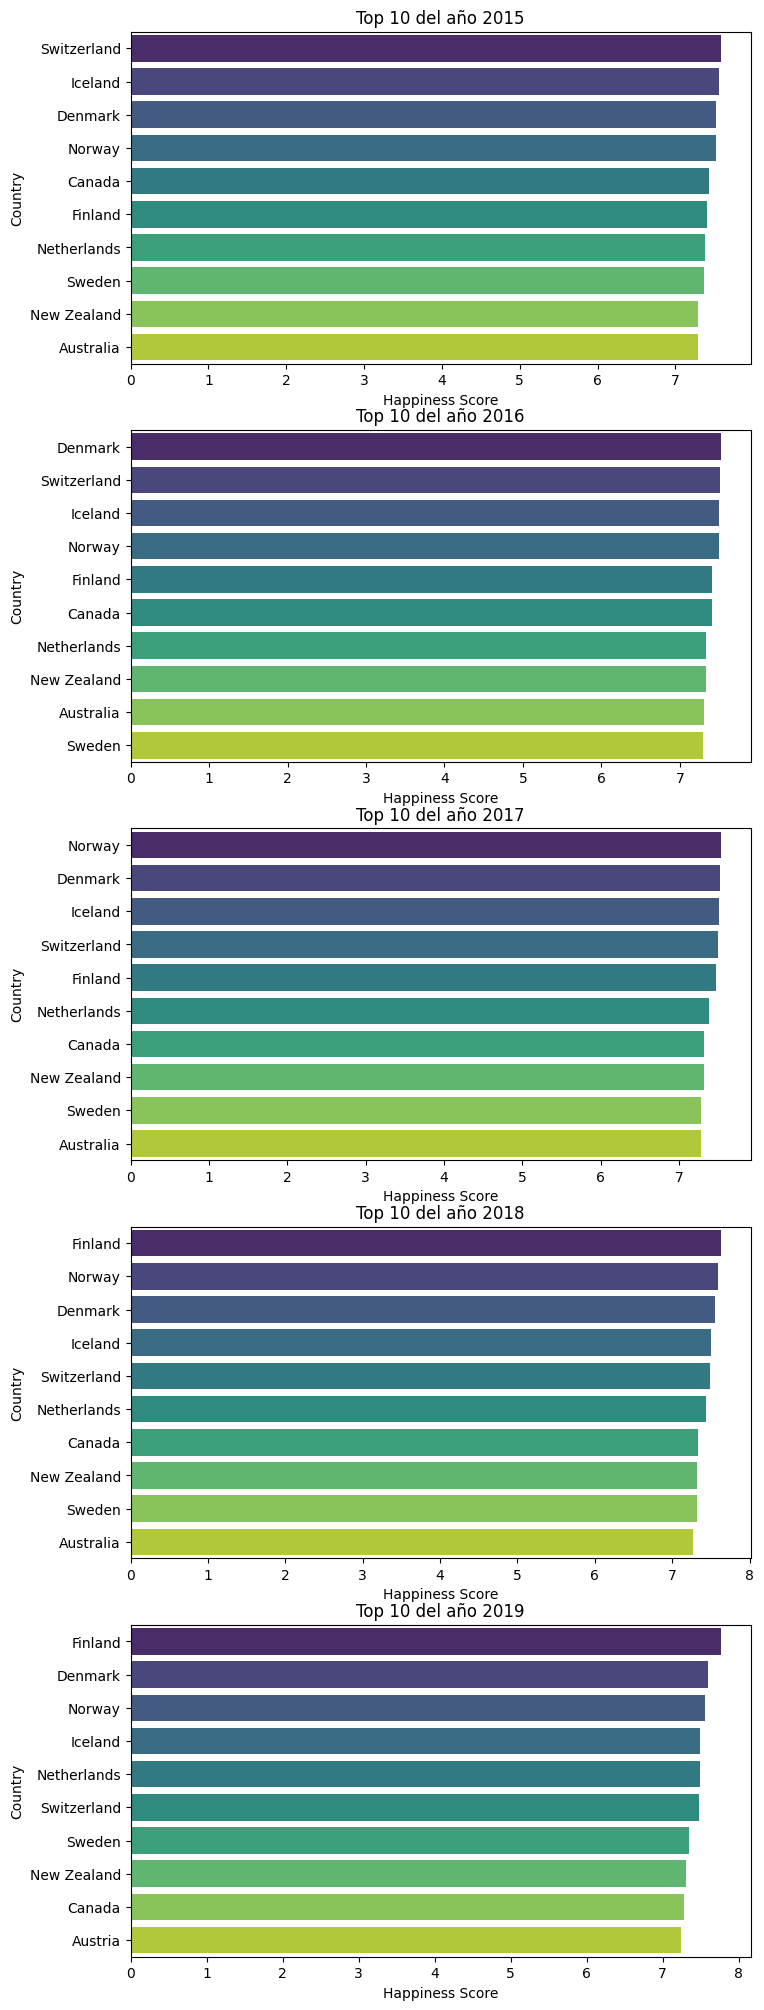

In [32]:
fig, axs = plt.subplots(5, 1, figsize=(8, 25))
for i, df in enumerate([top10_2015, top10_2016, top10_2017, top10_2018, top10_2019]):
    sns.barplot(data=df, x='Happiness Score', y='Country', ax=axs[i], palette='viridis', hue='Country')
    axs[i].set_title(f'Top 10 del año {2015+i}')
plt.show()

Como primera pregunta, se busca responder si el PIB está directamente relacionado con el índice de felicidad. Con la matriz de correlación prácticamente se puede confirmar que el producto interno bruto está directamente relacionado con el índice de felicidad; se verificará con los modelos por hacer. Otra pregunta que se busca contestar es si los países con más expectativa de vida también tienen un índice de felicidad más alto. También se puede verificar la relación entre estas dos variables con la matriz de correlación, únicamente es necesario verificar de qué forma lo afecta.

Para ver si la familia es lo que más influye en el índice de felicidad, esto únicamente se puede revisar en los dataframes que sí tienen familia como una de sus columnas (2015, 2016, 2017). 

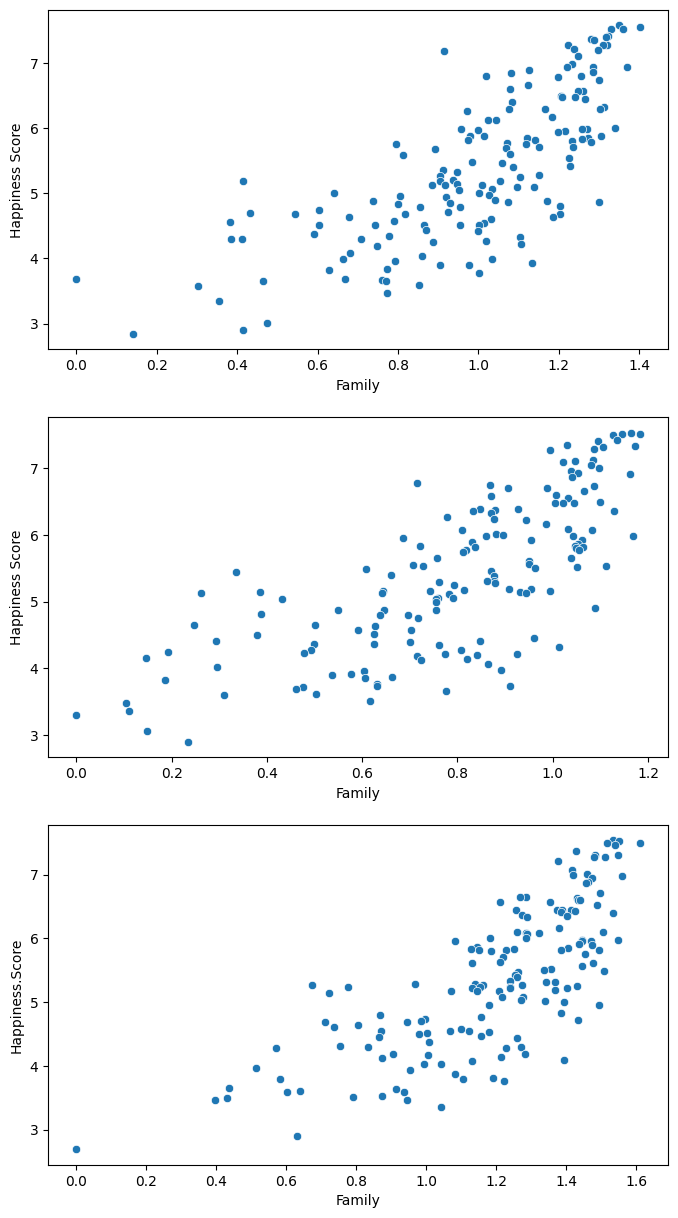

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15))
for i, df in enumerate([df_2015, df_2016, df_2017]):
    if i!=2:
        sns.scatterplot(data=df, x='Family', y='Happiness Score', ax=axs[i])
    else:
        sns.scatterplot(data=df, x='Family', y='Happiness.Score', ax=axs[i])
plt.show()

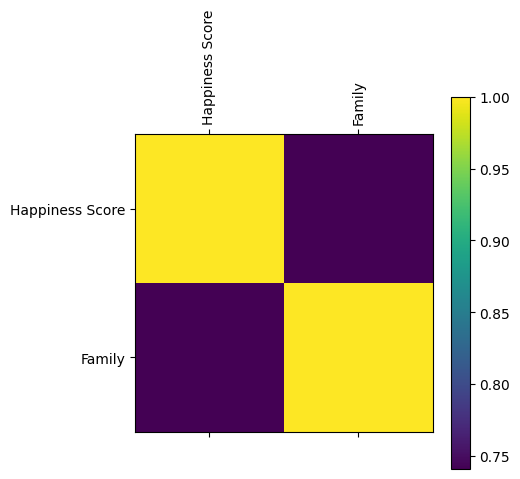

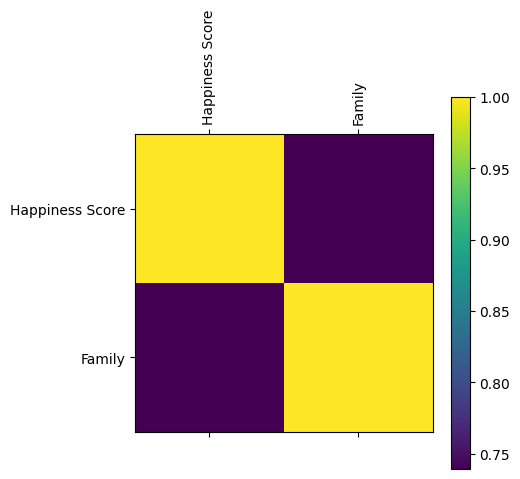

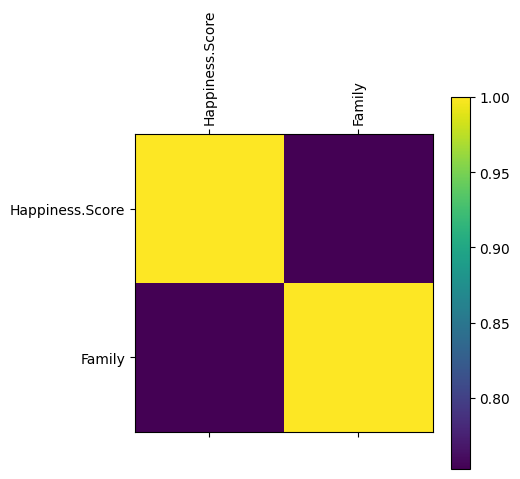

In [34]:
for i, df in enumerate([df_2015, df_2016, df_2017]):
    if i!=2:
        correlation = df[['Happiness Score', 'Family']].corr()
    else:
        correlation = df[['Happiness.Score', 'Family']].corr()
    plt.matshow(correlation, fignum=None)
    plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
    plt.yticks(range(len(correlation.columns)), correlation.columns)
    plt.colorbar()
plt.show()

Con los scatterplots y las matrices de correlación, se puede observar que en realidad hay una gran relación entre la familia y el índice de felicidad; con ayuda de los modelos será posible verificar si es la variable que más influye o no.

## Creación de columnas extra para mayor análisis y modelos necesarios

Finalmente, para determinar cuál es la región/ el continente con mayor índice de felicidad, será necesario determinar la región de cada país, ya que no todos los dataframes tienen esta clasificación incluída.

In [35]:
regiones = df_2015['Region'].unique()
regiones2 = df_2016['Region'].unique()

In [36]:
regiones == regiones2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Las regiones no cambian entre años, estas se usarán para el resto de datasets.

In [37]:
dict_regiones = {}
for region in regiones:
    dict_regiones[region]=df_2015.loc[df_2015['Region']==region]['Country'].to_list()
def set_region(country):
    for region, countries in dict_regiones.items():
        if country in countries:
            return region
    return 'Other'
df_concatenated['Region'] = df_concatenated['Country'].apply(set_region)

También se hará una clasificación previa de niveles de felicidad para una comparación posterior.

In [38]:
def clasificacion(score):
    if score > 7:
        return 'Feliz'
    elif score > 5:
        return 'Conforme'
    elif score > 3:
        return 'Infeliz'
    return 'Miserable'
df_concatenated['Clasificacion'] = df_concatenated['Happiness Score'].apply(clasificacion)

In [39]:
df_concatenated.loc[df_concatenated['Region']=='Other']

,Country,Happiness Rank,Happiness Score,GDP,Health,Freedom,Corruption,Generosity,Year,Region,Clasificacion
172,Puerto Rico,15,7.039,1.359430,0.777580,0.468230,0.122750,0.222020,2016,Other,Feliz
209,Belize,52,5.956,0.876160,0.455690,0.512310,0.107710,0.236840,2016,Other,Conforme
233,Somalia,76,5.440,0.000000,0.114660,0.567780,0.311800,0.272250,2016,Other,Conforme
254,Somaliland Region,97,5.057,0.255580,0.331080,0.391300,0.367940,0.514790,2016,Other,Conforme
270,Namibia,113,4.574,0.932870,0.347450,0.486140,0.103980,0.077950,2016,Other,Infeliz
300,South Sudan,143,3.832,0.393940,0.157810,0.196620,0.130150,0.258990,2016,Other,Infeliz
347,Taiwan Province of China,33,6.422,1.433627,0.793984,0.361467,0.063829,0.258360,2017,Other,Conforme
364,Belize,50,5.956,0.907975,0.450192,0.547509,0.096581,0.240016,2017,Other,Conforme
385,"Hong Kong S.A.R., China",71,5.472,1.551675,0.943062,0.490969,0.293934,0.374466,2017,Other,Conforme
407,Somalia,93,5.151,0.022643,0.113989,0.602127,0.282410,0.291631,2017,Other,Conforme


Hay países sin regiones, pero esto se corregirá.

In [40]:
la_Car = ['Puerto Rico', 'Belize', 'Trinidad & Tobago']
sub_africa = ['Somalia', 'Somaliland Region', 'Namibia', 'South Sudan', 'Gambia']
middleeast = ['Northern Cyprus']
cent_east_europe = ['North Macedonia']
east_asia = ['Taiwan Province of China', 'Hong Kong S.A.R., China']

In [41]:
for country in la_Car:
    dict_regiones['Latin America and Caribbean'].append(country)
for country in sub_africa:
    dict_regiones['Sub-Saharan Africa'].append(country)
for country in middleeast:
    dict_regiones['Middle East and Northern Africa'].append(country)
for country in cent_east_europe:
    dict_regiones['Central and Eastern Europe'].append(country)
for country in east_asia:
    dict_regiones['Eastern Asia'].append(country)
df_concatenated['Region'] = df_concatenated['Country'].apply(set_region)

In [42]:
df_concatenated.loc[df_concatenated['Region']=='Other']

,Country,Happiness Rank,Happiness Score,GDP,Health,Freedom,Corruption,Generosity,Year,Region,Clasificacion


Ahora ya no hay países sin regiones.

In [43]:
df_concatenated.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.294600
North America                      7.174700
Western Europe                     6.759311
Latin America and Caribbean        6.023811
Eastern Asia                       5.651567
Central and Eastern Europe         5.427807
Middle East and Northern Africa    5.346173
Southeastern Asia                  5.335227
Southern Asia                      4.580657
Sub-Saharan Africa                 4.190153
Name: Happiness Score, dtype: float64

En cuanto a promedio del índice de felicidad, se podría decir que la región más feliz son Australia y Nueva Zelanda, seguido de Norte América; sin embargo,se debe considerar que estas dos regiones en realidad solo contienen 2 países (en el caso de Norte América solo son EEUU y Canadá porque México se incluye en Latinoamérica).

Finalmente, podemos ver la distribución de las variables en cuanto a región y clasificación.

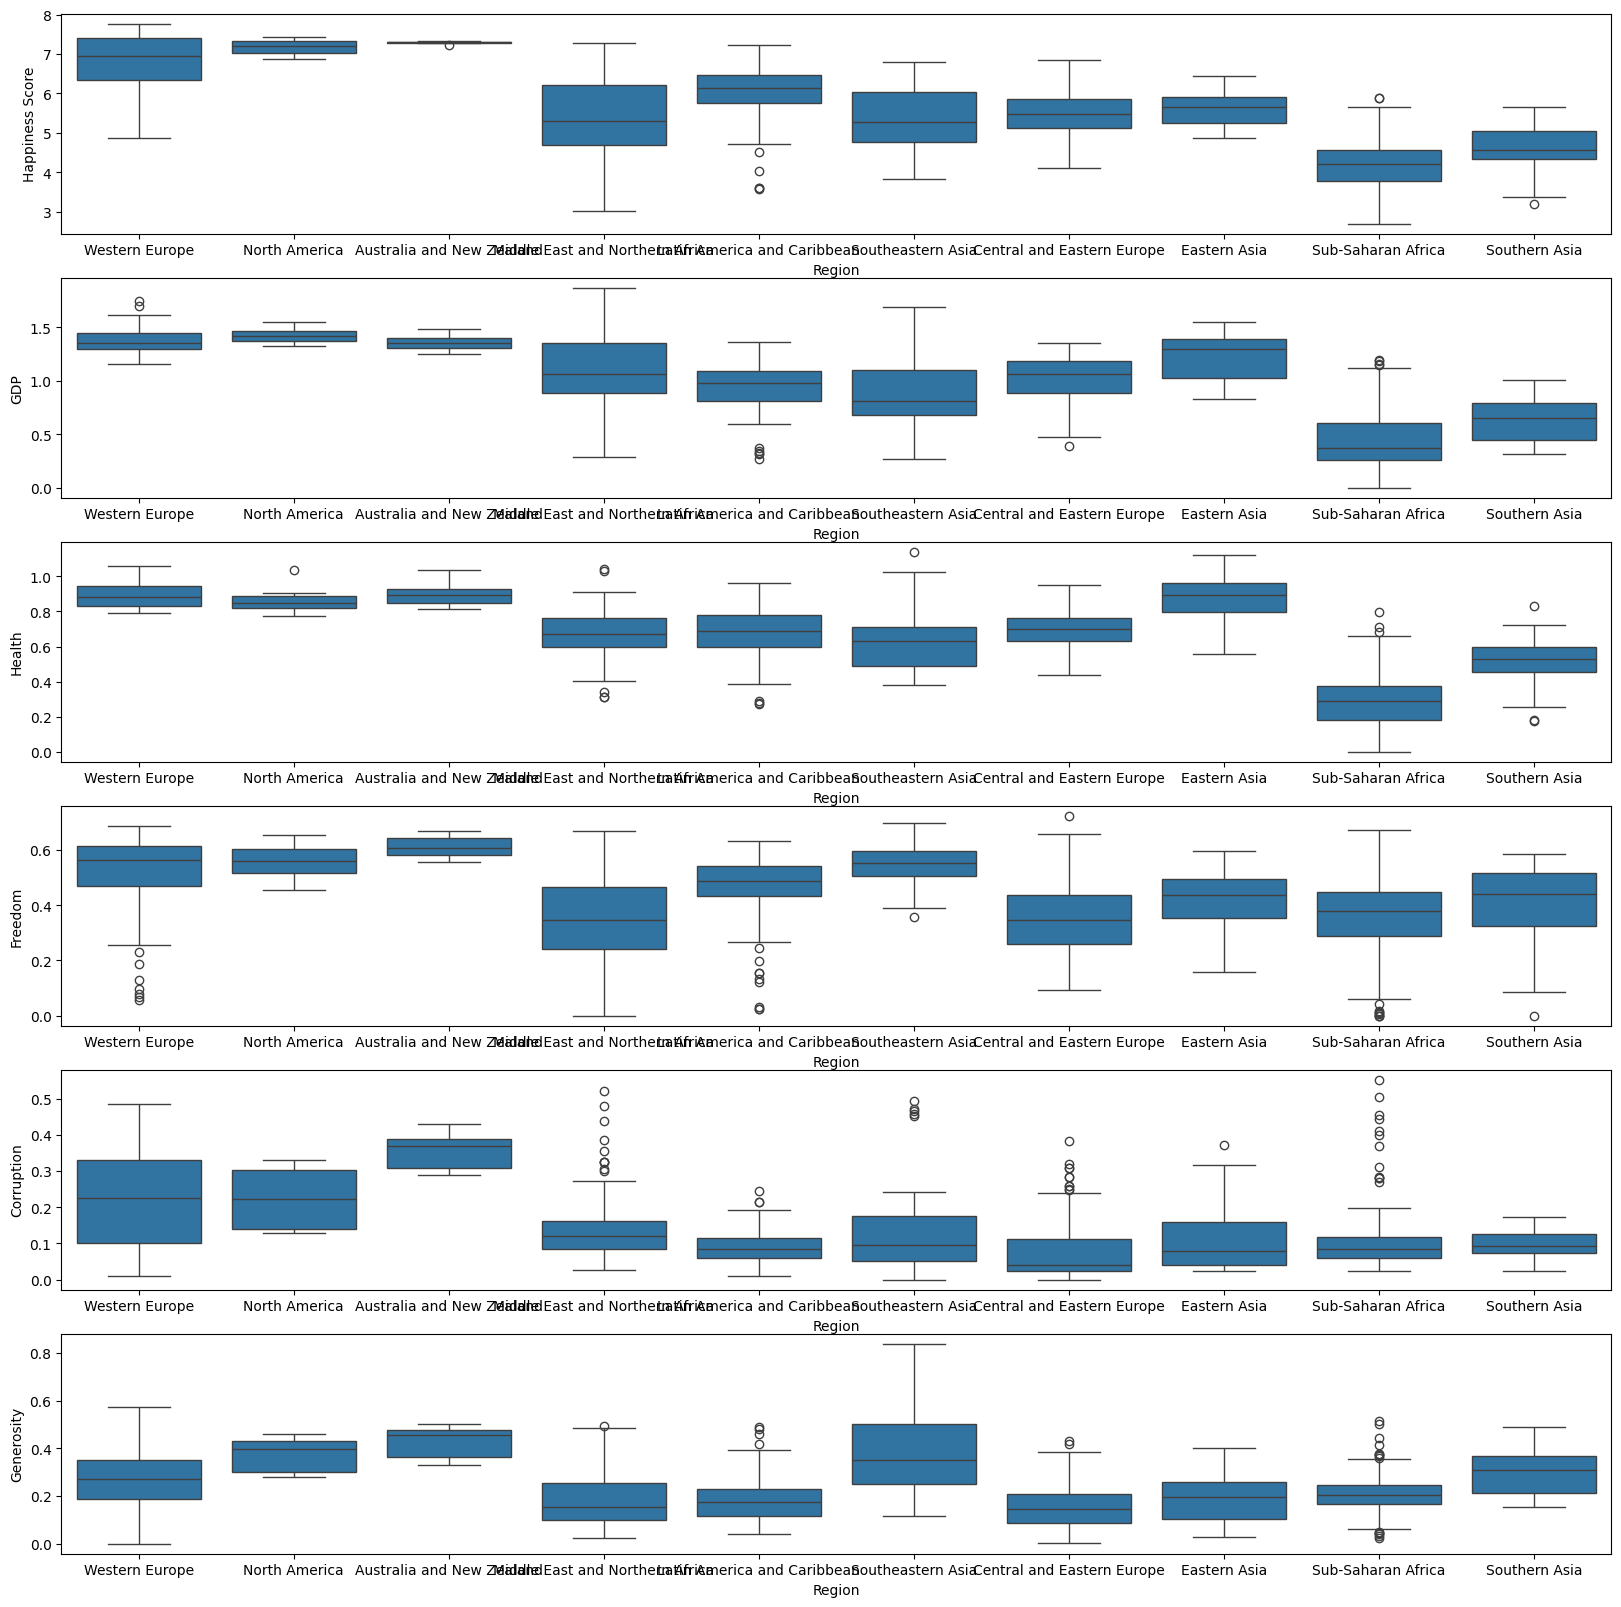

In [44]:
fig, axs = plt.subplots(6, 1, figsize=(20, 20))
for i, var in enumerate(vars_num):
    sns.boxplot(data=df_concatenated, x='Region', y=var, ax=axs[i])
plt.show()

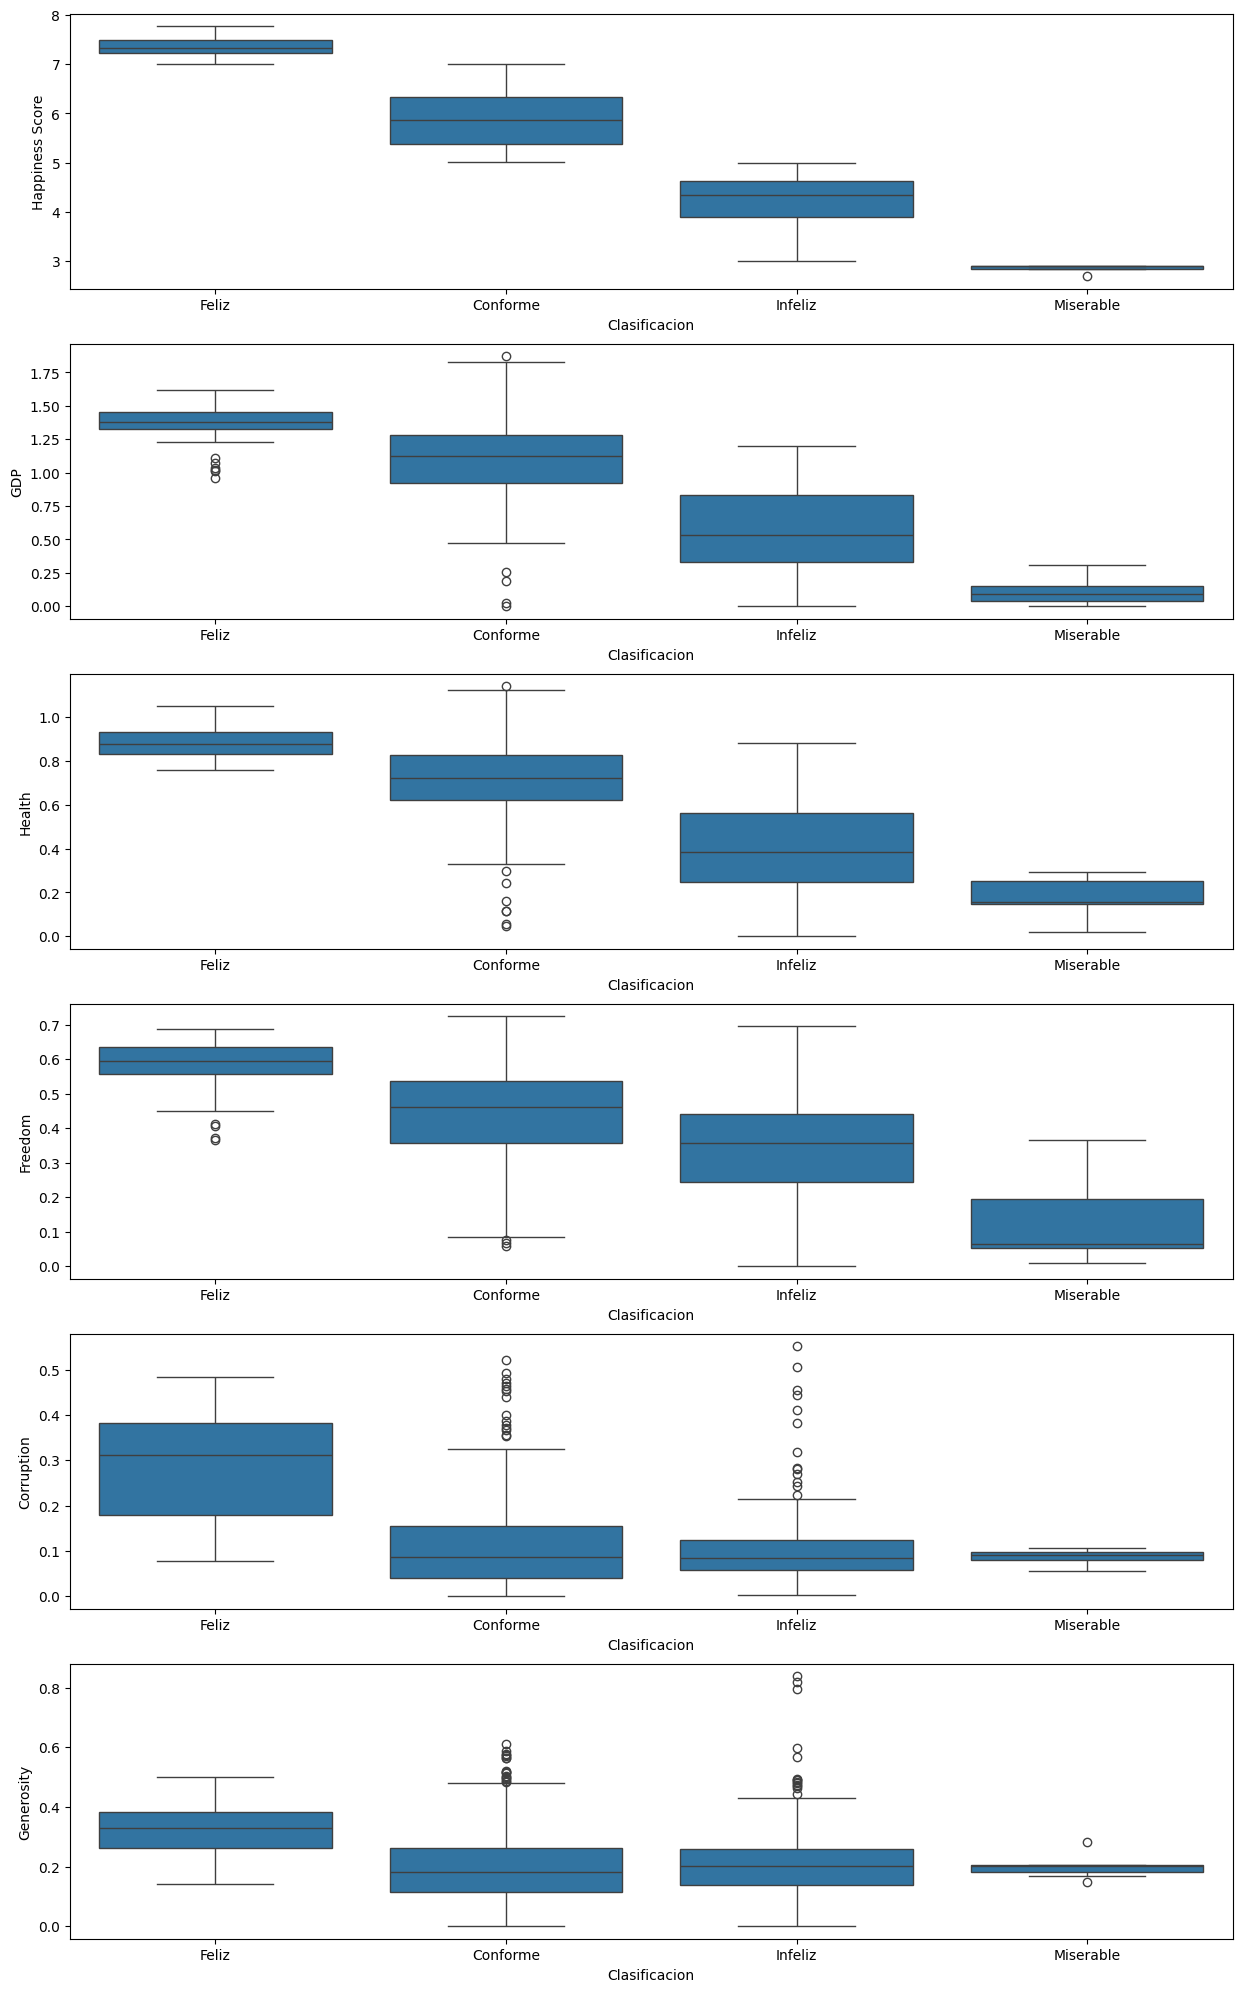

In [45]:
fig, axs = plt.subplots(6, 1, figsize=(15, 25))
for i, var in enumerate(vars_num):
    sns.boxplot(data=df_concatenated, x='Clasificacion', y=var, ax=axs[i])
plt.show()

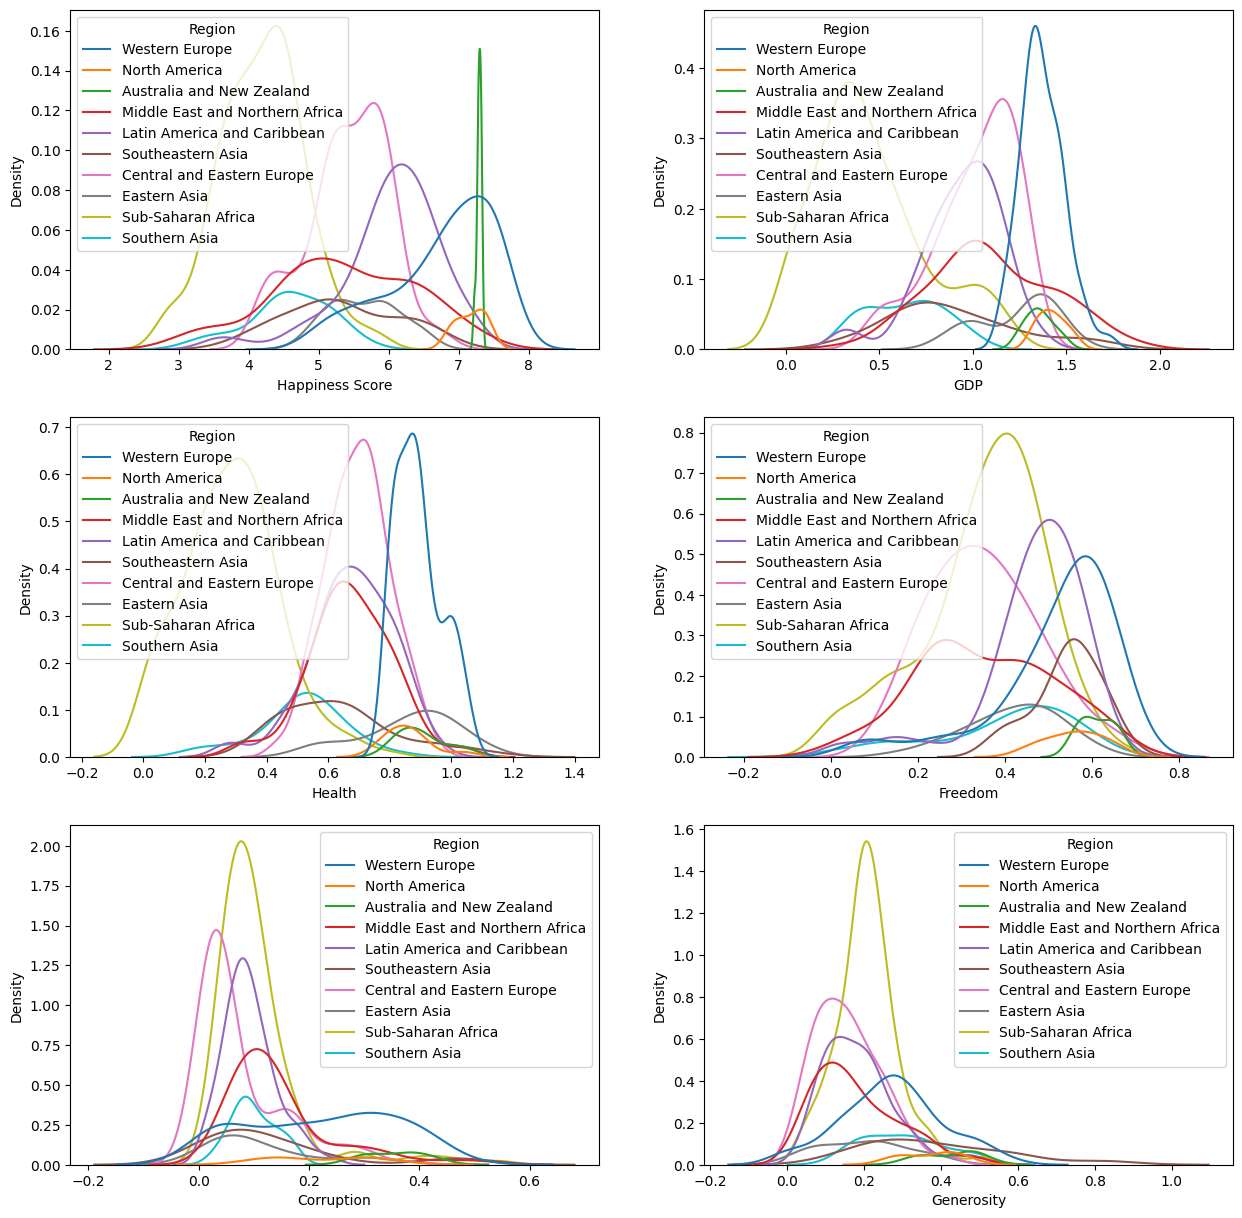

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, var in enumerate(vars_num):
    sns.kdeplot(data=df_concatenated, x=var, hue='Region', ax=axs[i//2, i%2])
plt.show()

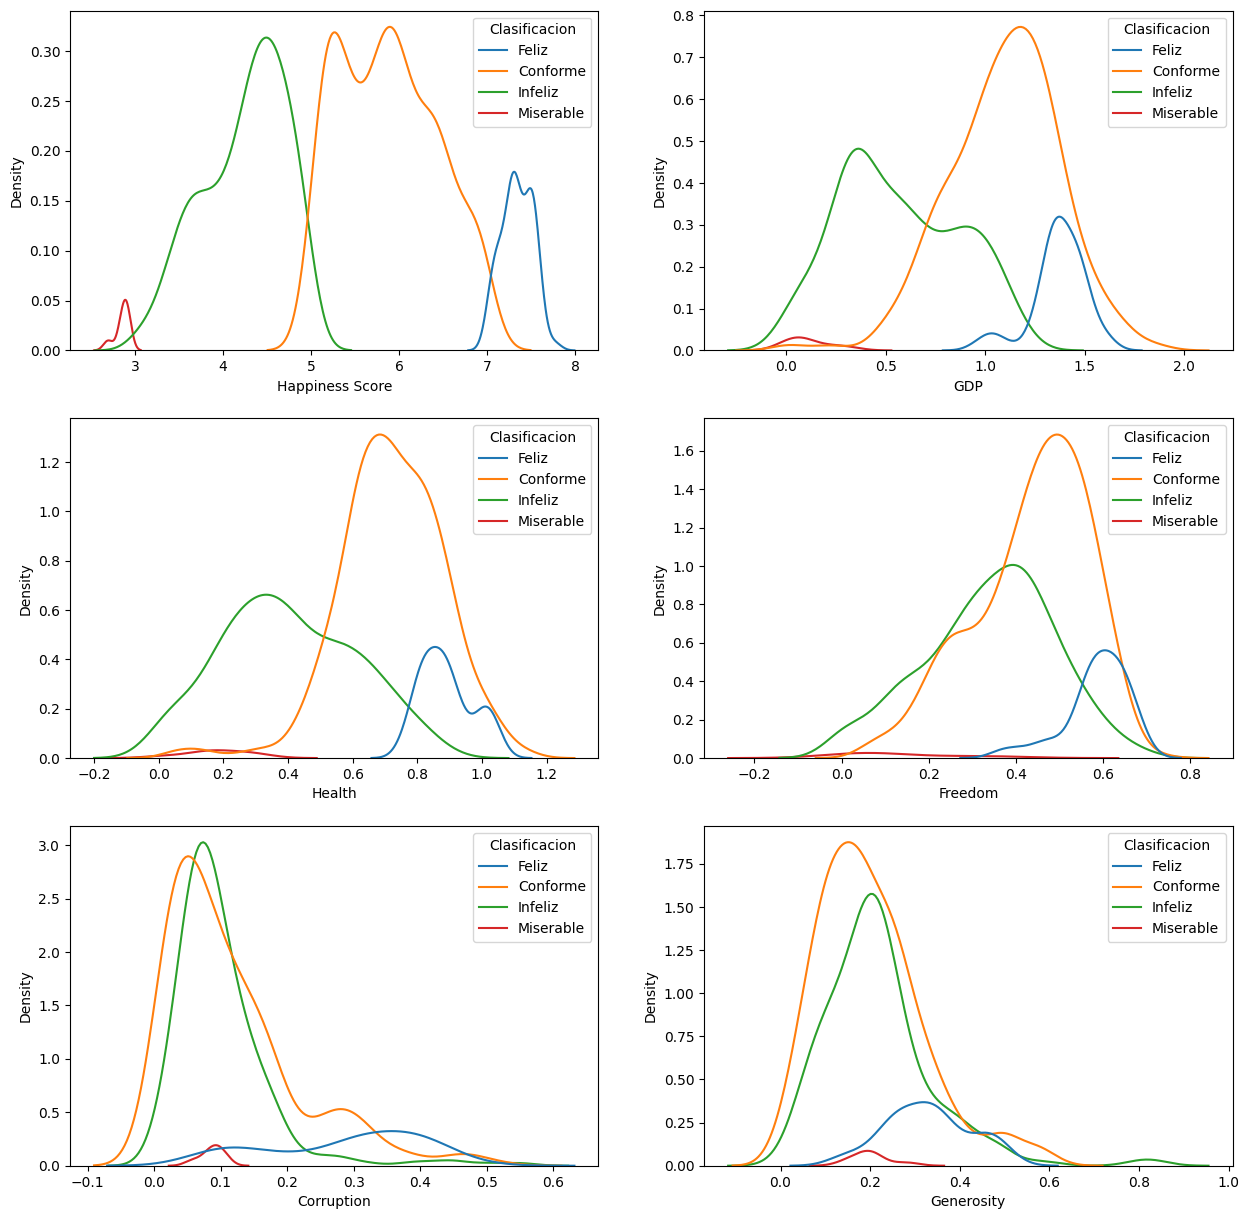

In [47]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, var in enumerate(vars_num):
    sns.kdeplot(data=df_concatenated, x=var, hue='Clasificacion', ax=axs[i//2, i%2])
plt.show()

# Modelos

## Clustering K-Means (No supervisado)

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Se quita el Happiness Score, porque esta es una variable resultante y nos permitirá comparar las clasificaciones con las nuestras. También se guarda el país y el año como índice para no perder información.

In [49]:
vars_num.remove('Happiness Score')
df_conc_2 = df_concatenated[vars_num].copy()
df_conc_2.set_index([df_concatenated['Country'], df_concatenated['Year']], inplace=True)

In [50]:
df_conc_2.head()

,,GDP,Health,Freedom,Corruption,Generosity
Country,Year,,,,,
Switzerland,2015,1.39651,0.94143,0.66557,0.41978,0.29678
Iceland,2015,1.30232,0.94784,0.62877,0.14145,0.43630
Denmark,2015,1.32548,0.87464,0.64938,0.48357,0.34139
Norway,2015,1.45900,0.88521,0.66973,0.36503,0.34699
Canada,2015,1.32629,0.90563,0.63297,0.32957,0.45811


In [51]:
scaler = StandardScaler()
df_conc_scaled = pd.DataFrame(scaler.fit_transform(df_conc_2), columns=vars_num, index=df_conc_2.index)

In [52]:
df_conc_scaled.head()

,,GDP,Health,Freedom,Corruption,Generosity
Country,Year,,,,,
Switzerland,2015,1.187243,1.325002,1.660095,2.783898,0.638633
Iceland,2015,0.954884,1.350826,1.419563,0.150771,1.779814
Denmark,2015,1.012018,1.055915,1.554274,3.387380,1.003513
Norway,2015,1.341400,1.098500,1.687285,2.265938,1.049318
Canada,2015,1.014016,1.180769,1.447015,1.930471,1.958206


In [53]:
inertias = []
mapping = {}
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=11).fit(df_conc_scaled)

    inertias.append(kmeanModel.inertia_)
    mapping[k] = inertias[-1]

c:\Users\PMarr\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\PMarr\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Inertia values:
1 : 3909.999999999999
2 : 2744.509548960758
3 : 1962.6888535176438
4 : 1707.673399843817
5 : 1467.9341893898259
6 : 1366.9662552437658
7 : 1253.5049934540439
8 : 1174.0016536807075
9 : 1093.690826347207


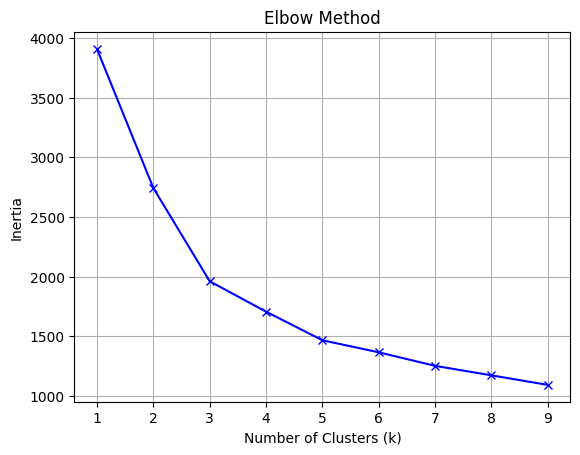

In [54]:
print("Inertia values:")
for key, val in mapping.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

Con la gráfica de codo se puede observar que un buen número de clusters es 4 o 5, para compararlo con la clasificación que hicimos anteriormente, se usarán 4.

In [55]:
X_train, X_test = train_test_split(df_conc_scaled, test_size=0.2, random_state=11)

In [56]:
modelo_kmeans = KMeans(n_clusters=4, random_state=11)
modelo_kmeans.fit(X_train)

KMeans(n_clusters=4, random_state=11)

In [57]:
X_train['Cluster'] = modelo_kmeans.labels_
X_test['Cluster'] = modelo_kmeans.predict(X_test)

In [58]:
X_test.head()

,,GDP,Health,Freedom,Corruption,Generosity,Cluster
Country,Year,,,,,,
Somalia,2018,-2.257824,-2.004556,1.715195,1.480437,0.157852,0
Moldova,2018,-0.637063,0.030010,-1.173796,-1.187410,-0.390164,1
Central African Republic,2019,-2.193684,-2.044844,-1.219549,-0.856294,0.133314,0
Comoros,2016,-1.579201,-1.259985,-1.682833,0.556813,-0.294466,0
South Korea,2015,0.812519,1.421492,-0.519655,-0.444103,-0.270991,1


In [59]:
for index, row in df_conc_2.iterrows():
    if index in X_train.index:
        df_conc_2.at[index, 'Cluster'] = X_train.loc[index]['Cluster']
    else:
        df_conc_2.at[index, 'Cluster'] = X_test.loc[index]['Cluster']

In [60]:
df_concatenated['Cluster'] = df_conc_2['Cluster'].values
df_concatenated['Cluster'] = df_concatenated['Cluster'].astype(int).astype('category')

In [61]:
df_concatenated.head()

,Country,Happiness Rank,Happiness Score,GDP,Health,Freedom,Corruption,Generosity,Year,Region,Clasificacion,Cluster
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,Western Europe,Feliz,3
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,Western Europe,Feliz,3
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,Western Europe,Feliz,3
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,Western Europe,Feliz,3
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,North America,Feliz,3


In [62]:
pd.crosstab(df_concatenated['Clasificacion'], df_concatenated['Cluster'])

Cluster,0,1,2,3
Clasificacion,,,,
Conforme,17,254,78,63
Feliz,0,11,1,60
Infeliz,165,66,55,5
Miserable,7,0,0,0


In [68]:
from sklearn.model_selection import cross_val_score, KFold

X = df_conc_2.drop(columns='Cluster')
y = df_conc_2['Cluster']

kf = KFold(n_splits=5, shuffle=True, random_state=11)

scores = cross_val_score(modelo_kmeans, X, y, cv=kf, scoring='adjusted_rand_score')
print(scores)
print(f'Adjusted Rand Index: {scores.mean()}')


[0.55332227 0.53710302 0.49177307 0.57645446 0.53443477]
Adjusted Rand Index: 0.5386175187920286


La validación cruzada muestra que los resultados del modelo son independientes de la partición de los datos, ya que todos muestran puntajes similares y cercanos a su media.

In [69]:
from sklearn.metrics import silhouette_score

silhouette_score(X, y)

0.26267919177324595

El puntaje de silueta es de 0.2626, lo cual indica que no es la mejor clusterización, ya que hay una superposición significativa entre los clusters.

In [71]:
from sklearn.metrics import f1_score

y_true = []
for index, row in df_concatenated.iterrows():
    if row['Clasificacion'] == 'Feliz':
        y_true.append(3)
    elif row['Clasificacion'] == 'Conforme':
        y_true.append(2)
    elif row['Clasificacion'] == 'Infeliz':
        y_true.append(1)
    else:
        y_true.append(0)
f1_score(y_true, y, average='weighted')

0.2853835201073299

La clasificación no fue muy exitosa (F1-Score = 0.2854), en la matriz se puede observar que muchos grupos clasificados tienen miembros de diferentes categorías.